
## Лабораторная работа № 1
## Шумилов Денис
## Группа 17-АС

In [3]:
import pandas as pd
import numpy as NP
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df_flights = pd.read_csv('flights.csv',nrows = 40000)
df_airport = pd.read_csv('airports.csv')

In [5]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


1. Подсчитайте количество отменённых рейсов.

In [43]:
df_flights[df_flights['CANCELLED']==1].shape

(923, 31)

In [44]:
df_flights.shape

(40000, 31)

2.Определите аэропорт,рейсы для которого отменяются наиболее часто

In [45]:
cdf = df_flights[df_flights['CANCELLED']==1]
s = cdf.groupby('ORIGIN_AIRPORT')['CANCELLED'].value_counts()


In [46]:
s

ORIGIN_AIRPORT  CANCELLED
ABI             1            12
ABQ             1             1
ACT             1             3
AEX             1             1
AMA             1             9
ANC             1             1
APN             1             1
ASE             1             3
ATL             1            10
AUS             1             9
AZO             1             1
BHM             1             1
BIL             1             1
BMI             1             2
BNA             1             3
BOI             1             2
BOS             1             2
BRO             1             2
BTM             1             1
BTR             1            10
BUR             1             2
BWI             1             4
CAE             1             1
CHA             1             1
CHS             1             1
CID             1             9
CLE             1             1
CLL             1             2
CLT             1             6
CMH             1             1
              

In [47]:
s.idxmax()[0]

'DFW'

In [48]:
s[['ORD']]

ORIGIN_AIRPORT  CANCELLED
ORD             1            40
Name: CANCELLED, dtype: int64

3.Определите корреляцию Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом.


In [49]:
from sklearn.preprocessing import LabelEncoder 

lb_make = LabelEncoder()
df_flights['AIRLINE'] = lb_make.fit_transform(df_flights['AIRLINE'])
df_flights['ORIGIN_AIRPORT'] = lb_make.fit_transform(df_flights['ORIGIN_AIRPORT'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
CANCELLED         40000 non-null float64
MONTH             40000 non-null float64
DAY               40000 non-null float64
DAY_OF_WEEK       40000 non-null float64
AIRLINE           40000 non-null int64
ORIGIN_AIRPORT    40000 non-null int64
dtypes: float64(4), int64(2)
memory usage: 1.8 MB
                CANCELLED  MONTH       DAY  DAY_OF_WEEK   AIRLINE  \
CANCELLED        1.000000    NaN -0.037133    -0.037133 -0.036588   
MONTH                 NaN    NaN       NaN          NaN       NaN   
DAY             -0.037133    NaN  1.000000     1.000000  0.006594   
DAY_OF_WEEK     -0.037133    NaN  1.000000     1.000000  0.006594   
AIRLINE         -0.036588    NaN  0.006594     0.006594  1.000000   
ORIGIN_AIRPORT  -0.034331    NaN  0.005870     0.005870  0.058952   

                ORIGIN_AIRPORT  
CANCELLED            -0.034331  
MONTH                      NaN  
DAY              

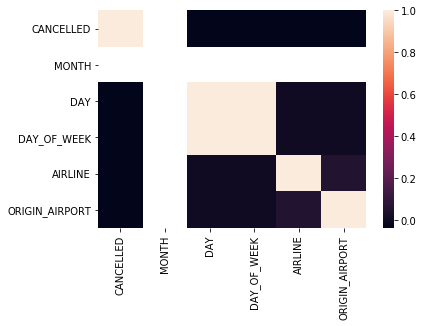

In [50]:
df_flights['CANCELLED'] = df_flights['CANCELLED'].astype('float')
df_flights['MONTH'] = df_flights['MONTH'].astype('float')
df_flights['DAY'] = df_flights['DAY'].astype('float')
df_flights['DAY_OF_WEEK'] = df_flights['DAY_OF_WEEK'].astype('float')


df_flights[['CANCELLED',  'MONTH','DAY' , 'DAY_OF_WEEK' , 'AIRLINE' , 'ORIGIN_AIRPORT']].info()

correlation = df_flights[['CANCELLED',  'MONTH' , 'DAY' , 'DAY_OF_WEEK' , 'AIRLINE' , 'ORIGIN_AIRPORT']].corr(method = 'spearman')

print(correlation)
sns.heatmap(correlation)
plt.show()

4.Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [61]:
print('Для F9 кол-во рейсов: ' + str(len(df_flights[(df_flights['AIRLINE'] == 'F9')])))
print('Кол-во отмененных рейсов: ' + str(len(df_flights[(df_flights['CANCELLED'] == 1) & (df_flights['AIRLINE'] == 'F9')])))
print('Кол-во перенаправленных рейсов: ' + str(len(df_flights[(df_flights['DIVERTED'] == 1) & (df_flights['AIRLINE'] == 'F9')])))
print('')
print('Для OO кол-во рейсов: ' + str(len(df_flights[(df_flights['AIRLINE'] == 'OO')])))
print('Кол-во отмененных рейсов: ' + str(len(df_flights[(df_flights['CANCELLED'] == 1) & (df_flights['AIRLINE'] == 'OO')])))
print('Кол-во перенаправленных рейсов: ' + str(len(df_flights[(df_flights['DIVERTED'] == 1) & (df_flights['AIRLINE'] == 'OO')])))
print('')
print('Для MQ кол-во рейсов: ' + str(len(df_flights[(df_flights['AIRLINE'] == 'MQ')])))
print('Кол-во отмененных рейсов: ' + str(len(df_flights[(df_flights['CANCELLED'] == 1) & (df_flights['AIRLINE'] == 'MQ')])))
print('Кол-во перенаправленных рейсов: ' + str(len(df_flights[(df_flights['DIVERTED'] == 1) & (df_flights['AIRLINE'] == 'MQ')])))

Для F9 кол-во рейсов: 622
Кол-во отмененных рейсов: 12
Кол-во перенаправленных рейсов: 1

Для OO кол-во рейсов: 4293
Кол-во отмененных рейсов: 151
Кол-во перенаправленных рейсов: 13

Для MQ кол-во рейсов: 2554
Кол-во отмененных рейсов: 359
Кол-во перенаправленных рейсов: 5


5.Определить скорость полёта для каждого рейса,скорость полета среднюю для авиакомпаний.


In [53]:
print('Номер рейса   Скорость полета для каждого рейса')

#V =  'DISTANCE'/ ('DEPARTURE_TIME' - 'ARRIVAL_TIME')
df_flights['speed'] = df_flights['DISTANCE'] / (df_flights['ARRIVAL_TIME'] - df_flights['DEPARTURE_TIME'])
print(df_flights['speed']) 
print('')
print('Средняя скорость полета авиакомпаний')

df_flights['sred_speed'] = df_flights['speed'] / df_flights['AIRLINE']

print(df_flights['sred_speed'])

Номер рейса   Скорость полета для каждого рейса
0        -0.744090
1         3.152909
2         2.895334
3         3.160594
4         6.161702
5         2.693220
6         2.651020
7         2.997179
8         2.853801
9         2.804173
10        2.794872
11        2.994490
12        2.692982
13        3.063584
14        2.700772
15        3.497585
16        3.447619
17        2.833622
18        3.344902
19        2.818182
20        2.692671
21        3.071026
22        2.470726
23        3.182065
24        2.932280
25        2.785859
26        3.500000
27        3.097917
28        2.975155
29        3.008803
           ...    
39970     3.049555
39971    -0.514894
39972     4.064000
39973     1.146853
39974     3.435897
39975   -45.666667
39976     4.437209
39977     3.525641
39978     1.668508
39979   -51.000000
39980    67.600000
39981     2.601732
39982     3.511811
39983     3.821918
39984     1.896552
39985     0.941725
39986     3.626728
39987     3.042781
39988     4.238356
39

#### 6.Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов)



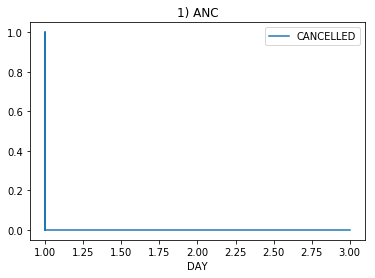

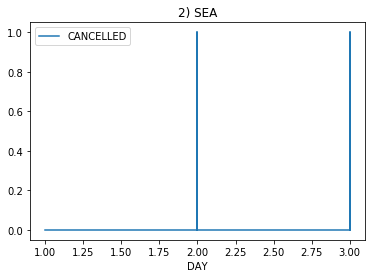

In [6]:
df_flights_airoports = df_flights[(df_flights.ORIGIN_AIRPORT == 'ANC') | (df_flights.ORIGIN_AIRPORT == 'SEA')][:]
arr = tuple(df_flights_airoports['ORIGIN_AIRPORT'].unique())
for i in range(0,len(arr)):
    df_flights = df_flights_airoports[['ORIGIN_AIRPORT','DAY','CANCELLED']]
    df_flights = df_flights[df_flights['ORIGIN_AIRPORT'] == arr[i]]  
    df_flights.plot(x='DAY', y='CANCELLED', title=str(i+1) + ") " + str(arr[i]))
    plt.show()

7.Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

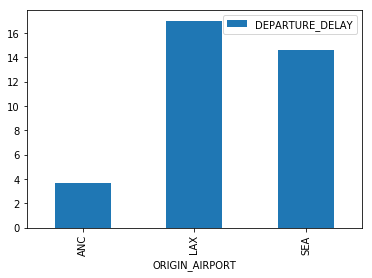

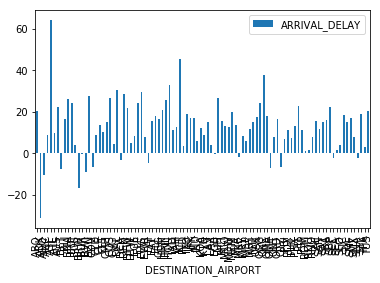

In [7]:
df_new=pd.read_csv('flights.csv', nrows = 80000)
df_new.dropna()
df_airoports3 = df_new[(df_new.ORIGIN_AIRPORT == 'ANC') | (df_new.ORIGIN_AIRPORT == 'LAX') | (df_new.ORIGIN_AIRPORT == 'SEA')][:]
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','DEPARTURE_DELAY'].mean().dropna().plot(kind='bar') 
df_airoports3.groupby('DESTINATION_AIRPORT')['DESTINATION_AIRPORT','ARRIVAL_DELAY'].mean().dropna().plot(kind='bar') 
plt.show()

8.Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

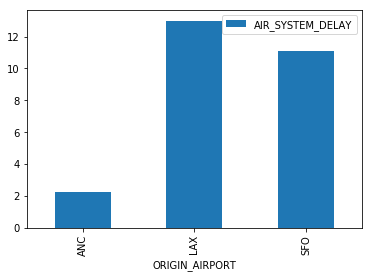

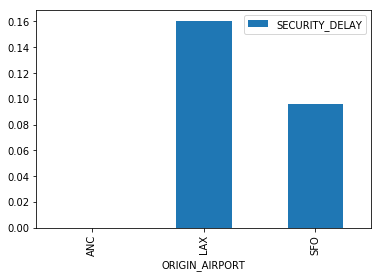

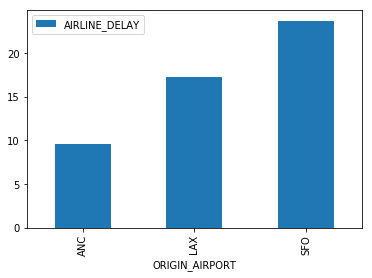

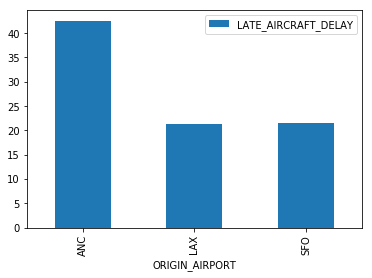

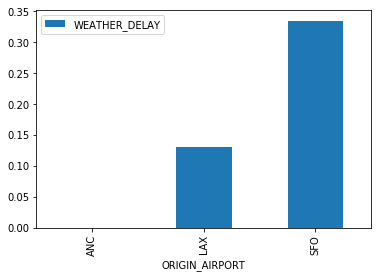

In [56]:
df_air = df_airoports3['AIR_SYSTEM_DELAY']
df_sec = df_airoports3['SECURITY_DELAY']
df_airl = df_airoports3['AIRLINE_DELAY']
df_late = df_airoports3['LATE_AIRCRAFT_DELAY']
df_weat = df_airoports3['WEATHER_DELAY']            

df_air = df_air.dropna().reset_index(drop=True)
df_sec = df_sec.dropna().reset_index(drop=True)
df_airl = df_airl.dropna().reset_index(drop=True)
df_late = df_late.dropna().reset_index(drop=True)
df_weat = df_weat.dropna().reset_index(drop=True)


df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIR_SYSTEM_DELAY'].mean().dropna().plot(kind='bar') 
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','SECURITY_DELAY'].mean().dropna().plot(kind='bar')
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIRLINE_DELAY'].mean().dropna().plot(kind='bar')
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','LATE_AIRCRAFT_DELAY'].mean().dropna().plot(kind='bar')    
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','WEATHER_DELAY'].mean().dropna().plot(kind='bar')
plt.legend()
plt.show()

9.Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [57]:
airline_list = df_flights['AIRLINE'].unique()

print('Максимальные задержки рейсов по отправке')
delay_dict = {}
for airline in airline_list:
    delay = len(df_flights[(df_flights['DEPARTURE_DELAY'] == 1) & (df_flights['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
print(' ')    
print('Максимальные задержки рейсов по прибытию')
delay_dict = {}
for airline in airline_list:
    delay = len(df_flights[(df_flights['ARRIVAL_DELAY'] == 1) & (df_flights['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
    
df1 = df_flights.groupby('AIRLINE')['ARRIVAL_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по прибытию у авиакомпании " + str(df1.index[len(df1)-1]))
df1 = df_flights.groupby('AIRLINE')['DEPARTURE_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по отправке у авиакомпании " + str(df1.index[len(df1)-1]))


Максимальные задержки рейсов по отправке
airline 1 	 38
airline 0 	 94
airline 11 	 89
airline 3 	 162
airline 8 	 12
airline 10 	 109
airline 6 	 17
airline 2 	 37
airline 9 	 83
airline 4 	 103
airline 7 	 38
airline 5 	 8
airline 13 	 336
airline 12 	 15
 
Максимальные задержки рейсов по прибытию
airline 1 	 27
airline 0 	 64
airline 11 	 54
airline 3 	 89
airline 8 	 11
airline 10 	 60
airline 6 	 23
airline 2 	 46
airline 9 	 82
airline 4 	 101
airline 7 	 24
airline 5 	 11
airline 13 	 188
airline 12 	 15
Максимальные задержки рейсов по прибытию у авиакомпании 13
Максимальные задержки рейсов по отправке у авиакомпании 13


In [49]:
d1 = df_flights[df_flights['ORIGIN_AIRPORT'] == 'ANC']

In [50]:
d1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1.0,1.0,4.0,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15,2015,1.0,1.0,4.0,AS,108,N309AS,ANC,SEA,45,...,455.0,-14.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16,2015,1.0,1.0,4.0,DL,1560,N3743H,ANC,SEA,45,...,451.0,-24.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18,2015,1.0,1.0,4.0,AS,122,N413AS,ANC,PDX,50,...,507.0,-18.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
32,2015,1.0,1.0,4.0,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1.0,A,NaN,NaN,NaN,NaN,NaN
36,2015,1.0,1.0,4.0,US,617,N804AW,ANC,PHX,152,...,905.0,-10.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
38,2015,1.0,1.0,4.0,AS,134,N464AS,ANC,SEA,155,...,558.0,-35.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
43,2015,1.0,1.0,4.0,AS,144,N514AS,ANC,PDX,200,...,619.0,-11.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
47,2015,1.0,1.0,4.0,AS,114,N303AS,ANC,SEA,220,...,628.0,-12.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
61,2015,1.0,1.0,4.0,AS,730,N423AS,ANC,SEA,505,...,916.0,-14.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
